In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")

# Display the data table for preview
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
#BUBBLE PLOT OF RIDE SHARING DATA

#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

#Create data frames for the charts

average_fare_df=pd.DataFrame({"Average_Fare":merged_df.groupby(["city","driver_count","type"]).fare.mean()}).reset_index("driver_count")

ride_count_df =pd.DataFrame({"Ride_Count":merged_df.groupby(["city","driver_count","type"]).ride_id.count()}).reset_index("city")

#Validate
average_fare_df.head()


,,driver_count,Average_Fare
city,type,,
Amandaburgh,Urban,12,24.641667
Barajasview,Urban,26,25.332273
Barronchester,Suburban,11,36.422500
Bethanyland,Suburban,22,32.956111
Bradshawfurt,Rural,7,40.064000


In [22]:
#Validate
ride_count_df.head()


,,city,Ride_Count
driver_count,type,,
12,Urban,Amandaburgh,18
26,Urban,Barajasview,22
11,Suburban,Barronchester,16
22,Suburban,Bethanyland,18
7,Rural,Bradshawfurt,10


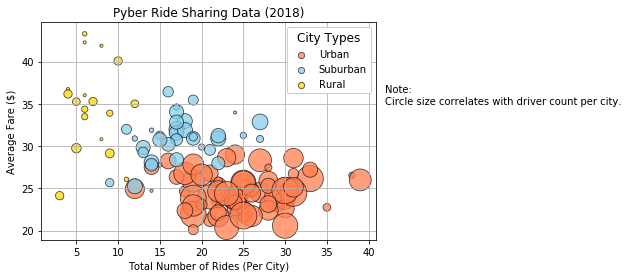

In [40]:
#Use for loop's method for creating the chart

# build the arrays for the loops

city_types = ["Urban", "Suburban", "Rural"]
chart_colors = ["coral", "skyblue", "gold"]

# Loop through each city type

for i in range(len(city_types)):
    
    # Build a df arranged by city type (Urban,Suburban, Rural) and grouped by cities
    
    city_group_df = merged_df.set_index("type").loc[city_types[i],:].groupby(["city"])

    # For the X axis, calculate the total number of rides per each city
    total_ride = city_group_df["city"].value_counts()

    # For the Y axis, calculate the average fare per city 
    average_fare = city_group_df["fare"].mean()

    # Total number of drivers per city 
    driver_per_city =  city_group_df["driver_count"].mean()
    
    # Graph by city (Scatter Plot)
    plt.scatter(total_ride, average_fare, s=(driver_per_city*10), 
                facecolor=chart_colors[i], edgecolor="black",
                alpha = 0.75, linewidth = 0.75)
    
# Graph Properties
pyber_legend = plt.legend(city_types, loc="best", framealpha=1)
pyber_legend.set_title("City Types",prop={"size":"large"})
                                   
# Size of the bubbles 
for j in range(len(city_types)):
    pyber_legend.legendHandles[j]._sizes = [40]
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("bubbleplot.png", dpi=180, bbox_inches="tight")
plt.show()

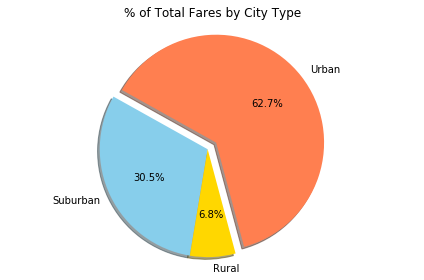

In [57]:
# TOTAL FARES BY CITY TYPE (pie charts)

city_fares = [0,0,0]
explode = (0.1, 0, 0)


# Sum fares for each of the city types
for i in range(len(city_types)):
    type_fares_df = merged_df.set_index("type").loc[city_types[i],:]
    city_fares[i] = type_fares_df["fare"].sum()

# Show pie chart and save image 
plt.pie(city_fares, explode=explode, labels=city_types, colors=chart_colors,autopct="%1.1f%%", shadow=True, startangle=285)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.savefig("farespiechart.png", dpi=180, bbox_inches="tight")

plt.show()

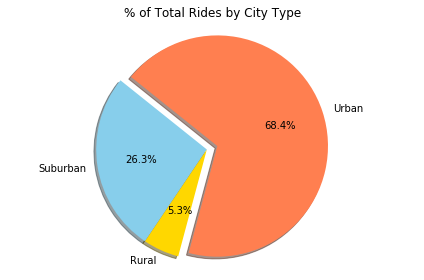

In [56]:
# TOTAL RIDES BY CITY TYPE (pie charts)

city_rides = [0,0,0]
explode = (0.1, 0, 0)

# Sum rides for each of the city types
for i in range(len(city_types)):
    type_rides_df = merged_df.set_index("type").loc[city_types[i],:]
    city_rides[i] = type_rides_df["fare"].count()

# Show pie chart and save image  
plt.pie(city_rides, explode=explode, labels=city_types, colors=chart_colors,autopct="%1.1f%%", shadow=True, startangle=255)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.savefig("totalridespiechart.png", dpi=180, bbox_inches="tight")
plt.show()

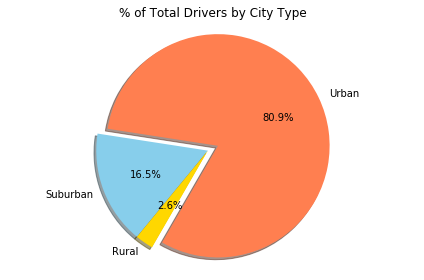

In [59]:
# TOTAL DRIVERS BY CITY TYPE (pie charts)

city_drivers = [0,0,0]
explode = (0.1, 0, 0)

# Sum drivers for each of the city types
for i in range(len(city_types)):
    type_drivers_df = city_data_df.set_index("type").loc[city_types[i],:]
    city_drivers[i] = type_drivers_df["driver_count"].sum()

# Show pie chart and save image     
plt.pie(city_drivers, explode=explode, labels=city_types, colors=chart_colors,autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.tight_layout()
plt.savefig("totaldriverspiechart.png", dpi=180, bbox_inches="tight")
plt.show()